1. install Miniconda3
2. conda create -n xr -c conda-forge python=3 xarray
3. conda activate xr

In [1]:
import xarray as xr

In [2]:
ds = xr.open_mfdataset('./ESACCI-WATERVAPOUR-L3C-TCWV-olci-20????-05deg-fv1.0.nc', combine='nested', concat_dim='time')

In [3]:
ds

<xarray.Dataset>
Dimensions:            (lat: 360, lon: 720, time: 12)
Coordinates:
  * lat                (lat) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * lon                (lon) float64 -179.8 -179.2 -178.8 ... 178.8 179.2 179.8
  * time               (time) datetime64[ns] 2018-01-01 ... 2018-12-01
Data variables:
    tcwv_counts        (time, lat, lon) float32 dask.array<shape=(12, 360, 720), chunksize=(1, 360, 720)>
    crs                (time) int32 1178880137 1178880137 ... 1178880137
    tcwv               (time, lat, lon) float32 dask.array<shape=(12, 360, 720), chunksize=(1, 360, 720)>
    tcwv_uncertainty   (time, lat, lon) float32 dask.array<shape=(12, 360, 720), chunksize=(1, 360, 720)>
    tcwv_quality_flag  (time, lat, lon) float32 dask.array<shape=(12, 360, 720), chunksize=(1, 360, 720)>
Attributes:
    title:                      Water Vapour CCI Total Column of Water Vapour...
    institution:                Brockmann Consult GmbH; EUMETSAT/CMSAF
    sour

In [4]:
ds.tcwv

<xarray.DataArray 'tcwv' (time: 12, lat: 360, lon: 720)>
dask.array<shape=(12, 360, 720), dtype=float32, chunksize=(1, 360, 720)>
Coordinates:
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time     (time) datetime64[ns] 2018-01-01 2018-02-01 ... 2018-12-01
Attributes:
    long_name:            Mean of Total Column of Water (Level-3 global month...
    standard_name:        atmosphere_water_vapor_content 
    units:                kg/m^2
    ancillary_variables:  tcwv_uncertainty tcwv_counts

## Note, `_FillValue` should be set, even if it is NaN.

In [5]:
ds.tcwv_uncertainty

<xarray.DataArray 'tcwv_uncertainty' (time: 12, lat: 360, lon: 720)>
dask.array<shape=(12, 360, 720), dtype=float32, chunksize=(1, 360, 720)>
Coordinates:
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time     (time) datetime64[ns] 2018-01-01 2018-02-01 ... 2018-12-01
Attributes:
    long_name:  Uncertainty associated with the mean of Total Column of Water...
    units:      kg/m^2

## Note, `_FillValue` should be set, even if it is NaN.

In [6]:
ds.tcwv.plot.imshow(col='time', col_wrap=3, cmap='Blues')

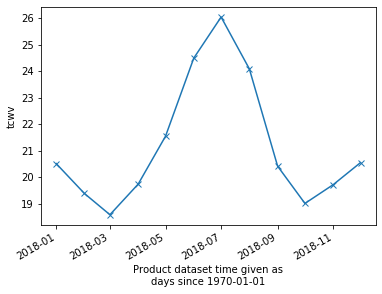

In [7]:
ds.tcwv.mean(dim=('lat', 'lon')).plot.line(marker='x')

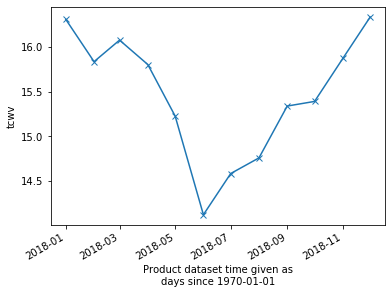

In [8]:
ds.tcwv.std(dim=('lat', 'lon')).plot.line(marker='x')

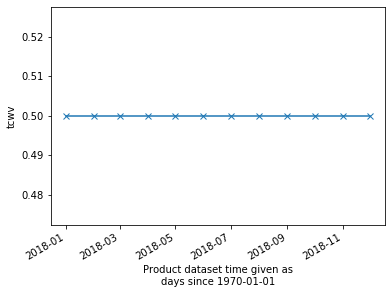

In [9]:
ds.tcwv.min(dim=('lat', 'lon')).plot.line(marker='x')

## Min TCWV is constantly 0.5 kg/m^2, is that ok?

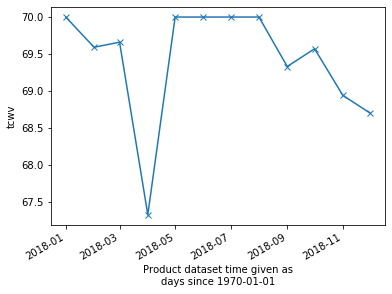

In [10]:
ds.tcwv.max(dim=('lat', 'lon')).plot.line(marker='x')

## It seems there is a cut off at 70 kg/m^2, is that ok?

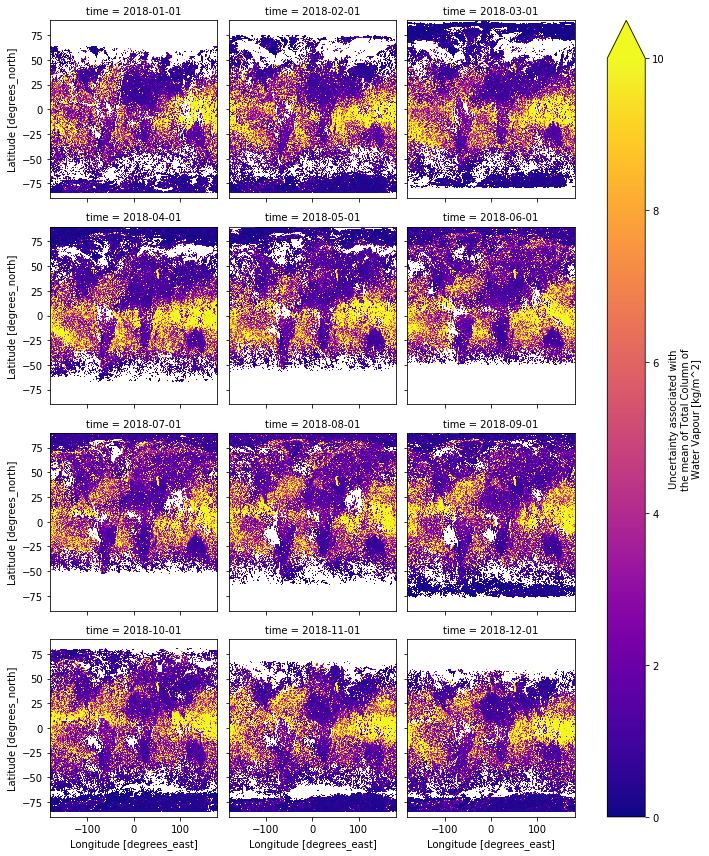

In [11]:
ds.tcwv_uncertainty.plot.imshow(col='time', col_wrap=3, cmap='plasma', vmin=0, vmax=10)

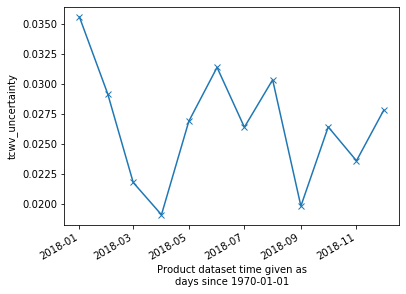

In [12]:
ds.tcwv_uncertainty.min(dim=('lat', 'lon')).plot.line(marker='x')

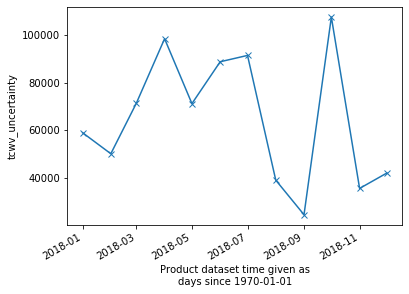

In [13]:
ds.tcwv_uncertainty.max(dim=('lat', 'lon')).plot.line(marker='x')

In [14]:
ds.tcwv_uncertainty.max().values

array(107493.664, dtype=float32)

## Check: max uncertainty is 107494 kg/m^2, really :)

In [15]:
tcwv_anomaly = ds.tcwv - ds.tcwv.mean(dim='time')

D:\olaf\Miniconda3\envs\xr\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
D:\olaf\Miniconda3\envs\xr\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
D:\olaf\Miniconda3\envs\xr\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
D:\olaf\Miniconda3\envs\xr\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
D:\olaf\Miniconda3\envs\xr\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
D:\olaf\Miniconda3\envs\xr\lib\site-packages\dask\array\numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
D:\olaf\Miniconda3\envs\xr\l

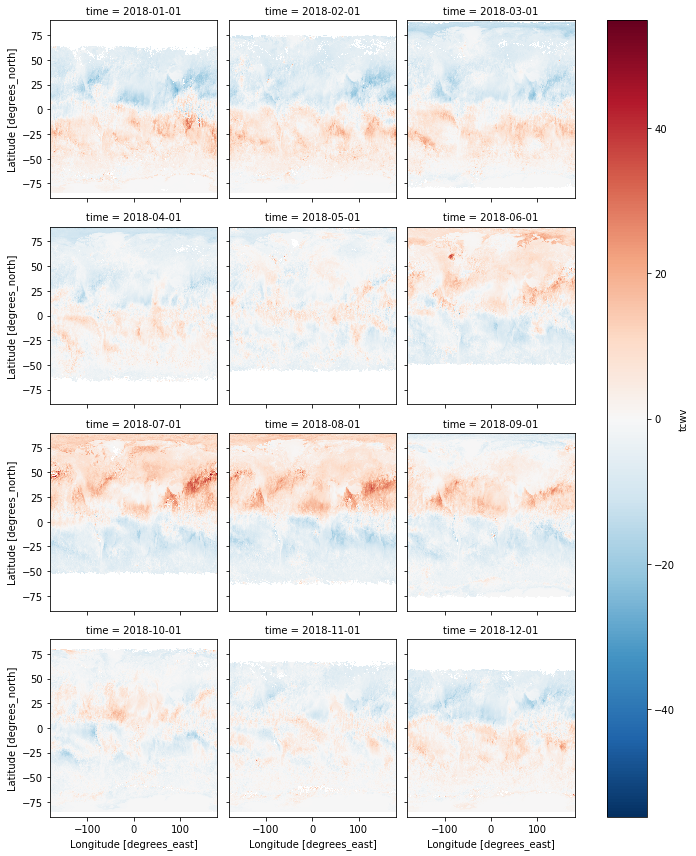

In [16]:
tcwv_anomaly.plot.imshow(col='time', col_wrap=3)

In [17]:
ds.to_zarr('ESACCI-WATERVAPOUR-L3C-TCWV-olci-05deg-fv1.0.zarr')

To show in xcube viewer:

    xcube serve --show --style "tcwv=(0.,70.,'Blues')" ESACCI-WATERVAPOUR-L3C-TCWV-olci-05deg-fv1.0.zarr